In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
df.shape

(8124, 23)

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [11]:
"""Exploratory Data Analysis"""

'Exploratory Data Analysis'

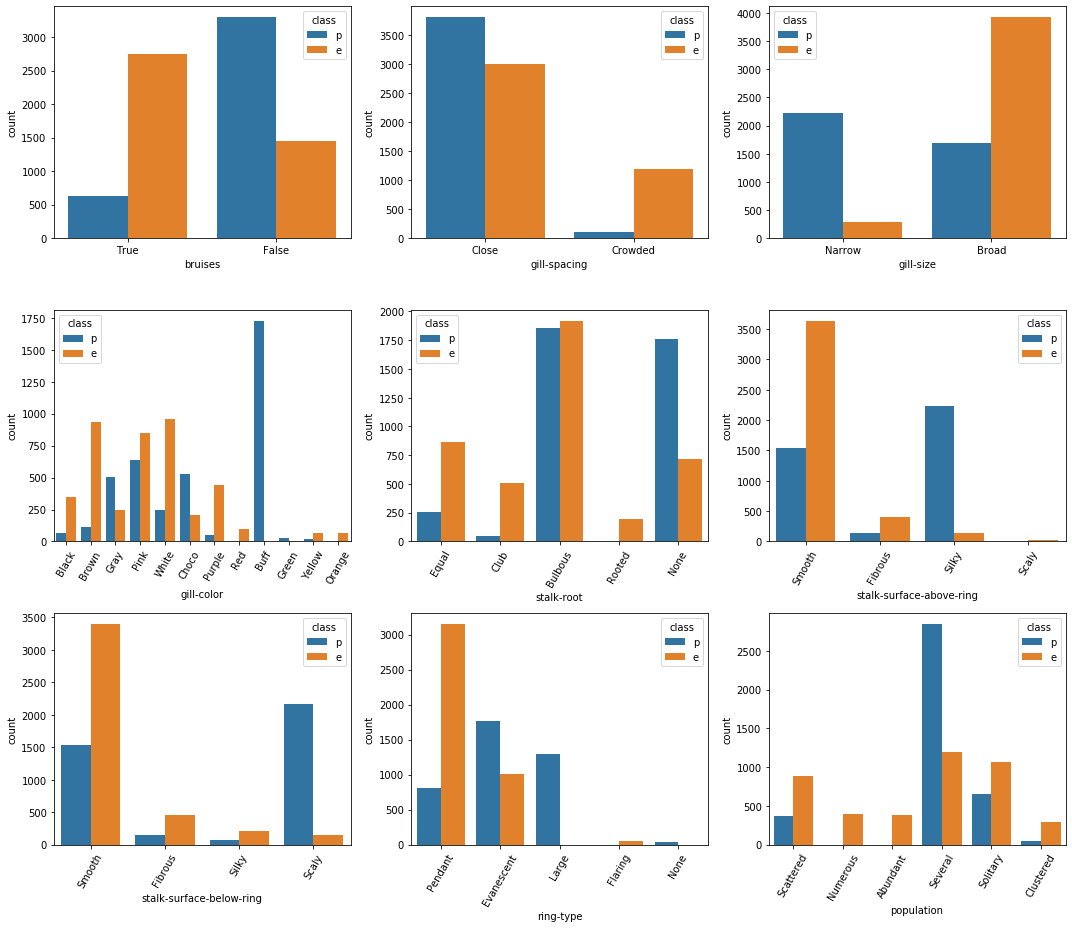

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13)) 

bruises_bar = sns.countplot(x="bruises", hue="class", data=df, ax=axes[0][0]);
bruises_bar.set_xticklabels(["True", "False"])
gill_spacing_bar = sns.countplot(x="gill-spacing", hue="class", data=df, ax=axes[0][1]);
gill_spacing_bar.set_xticklabels(["Close", "Crowded", "Distant"])
gill_size_bar = sns.countplot(x="gill-size", hue="class", data=df, ax=axes[0][2]);
gill_size_bar.set_xticklabels(["Narrow", "Broad"])
gill_color_bar = sns.countplot(x="gill-color", hue="class", data=df, ax=axes[1][0]);
gill_color_bar.set_xticklabels(["Black", "Brown", "Gray", "Pink", "White", "Choco", "Purple", "Red", "Buff", "Green", "Yellow", "Orange"], rotation=60)


stalk_root_bar = sns.countplot(x="stalk-root", hue="class", data=df, ax=axes[1][1]);
stalk_root_bar.set_xticklabels(["Equal", "Club", "Bulbous", "Rooted", "None"], rotation=60)


stalk_sar_bar = sns.countplot(x="stalk-surface-above-ring", hue="class", data=df, ax=axes[1][2]);
stalk_sar_bar.set_xticklabels(["Smooth", "Fibrous", "Silky", "Scaly"], rotation=60)

stalk_sbr_bar = sns.countplot(x="stalk-surface-below-ring", hue="class", data=df, ax=axes[2][0]);
stalk_sbr_bar.set_xticklabels(["Smooth", "Fibrous", "Silky", "Scaly"], rotation=60)


ring_type_bar = sns.countplot(x="ring-type", hue="class", data=df, ax=axes[2][1]);
ring_type_bar.set_xticklabels(["Pendant", "Evanescent", "Large", "Flaring", "None"], rotation=60)


population_bar = sns.countplot(x="population", hue="class", data=df, ax=axes[2][2]);
population_bar.set_xticklabels(["Scattered", "Numerous", "Abundant", "Several", "Solitary", "Clustered"], rotation=60)

fig.tight_layout()
plt.show()

In [13]:
"""Model Building"""

'Model Building'

In [14]:
y=df['class']
x=df.drop('class',axis=1)

In [15]:
y.shape,x.shape

((8124,), (8124, 22))

In [16]:
le=LabelEncoder()
y=le.fit_transform(y)

In [17]:
x=pd.get_dummies(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [19]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [20]:
"""Linear Discriminant Analysis"""

'Linear Discriminant Analysis'

In [21]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
pred=lda.predict(x_test)

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



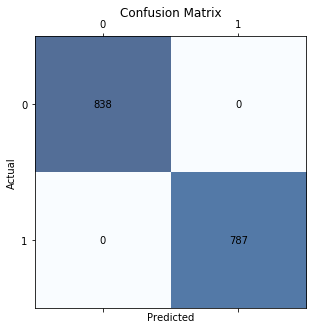

In [23]:
cm=confusion_matrix(y_test,pred)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
print('Accuracy Score:',accuracy_score(y_test,pred)*100)

Accuracy Score: 100.0


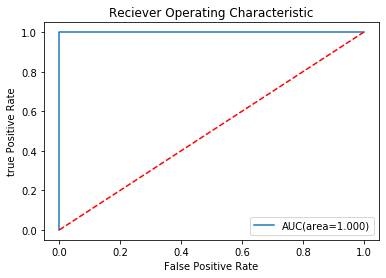

In [25]:
auc=roc_auc_score(y_test,pred)
fpr,tpr,thr=roc_curve(y_test,lda.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='AUC(area=%0.3f)'% auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Reciever Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('true Positive Rate')
plt.legend(loc='lower right')
plt.show()